<a href="https://colab.research.google.com/github/daichi213/handson-unsupervised-learning/blob/practice/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## 準備

In [ ]:
from sklearn import datasets,pipeline,base,_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

from scipy.stats import uniform

from matplotlib import pyplot as plt

In [ ]:
datasets = datasets.load_iris()

In [ ]:
raw_data = datasets.data
raw_target = datasets.target

## EDA

### Numpyのデータ変形練習

In [ ]:
raw_data.shape

(150, 4)

In [ ]:
raw_target.shape , raw_target[0:2]

((150,), array([0, 0]))

In [ ]:
raw_data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# target=0のデータ数
len(raw_target[raw_target == 0])

50

In [ ]:
# target=1のデータ数
len(raw_target[raw_target == 1])

50

In [ ]:
# target=2のデータ数
len(raw_target[raw_target == 2])

50

In [ ]:
np.hstack([raw_target.reshape(-1,1), raw_data])

array([[0. , 5.1, 3.5, 1.4, 0.2],
       [0. , 4.9, 3. , 1.4, 0.2],
       [0. , 4.7, 3.2, 1.3, 0.2],
       [0. , 4.6, 3.1, 1.5, 0.2],
       [0. , 5. , 3.6, 1.4, 0.2],
       [0. , 5.4, 3.9, 1.7, 0.4],
       [0. , 4.6, 3.4, 1.4, 0.3],
       [0. , 5. , 3.4, 1.5, 0.2],
       [0. , 4.4, 2.9, 1.4, 0.2],
       [0. , 4.9, 3.1, 1.5, 0.1],
       [0. , 5.4, 3.7, 1.5, 0.2],
       [0. , 4.8, 3.4, 1.6, 0.2],
       [0. , 4.8, 3. , 1.4, 0.1],
       [0. , 4.3, 3. , 1.1, 0.1],
       [0. , 5.8, 4. , 1.2, 0.2],
       [0. , 5.7, 4.4, 1.5, 0.4],
       [0. , 5.4, 3.9, 1.3, 0.4],
       [0. , 5.1, 3.5, 1.4, 0.3],
       [0. , 5.7, 3.8, 1.7, 0.3],
       [0. , 5.1, 3.8, 1.5, 0.3],
       [0. , 5.4, 3.4, 1.7, 0.2],
       [0. , 5.1, 3.7, 1.5, 0.4],
       [0. , 4.6, 3.6, 1. , 0.2],
       [0. , 5.1, 3.3, 1.7, 0.5],
       [0. , 4.8, 3.4, 1.9, 0.2],
       [0. , 5. , 3. , 1.6, 0.2],
       [0. , 5. , 3.4, 1.6, 0.4],
       [0. , 5.2, 3.5, 1.5, 0.2],
       [0. , 5.2, 3.4, 1.4, 0.2],
       [0. , 4

In [ ]:
# Ndarray -> DataSetsへ変換
import pandas as pd

raw_df = pd.DataFrame(np.hstack([raw_target.reshape(-1,1), raw_data]), columns=['target','length1','length2','length3','length4'])

In [ ]:
raw_df.tail()

,target,length1,length2,length3,length4
145,2.0,6.7,3.0,5.2,2.3
146,2.0,6.3,2.5,5.0,1.9
147,2.0,6.5,3.0,5.2,2.0
148,2.0,6.2,3.4,5.4,2.3
149,2.0,5.9,3.0,5.1,1.8


## 交差検証

ランダムサーチ => Gridサーチの順番で最適なハイパーパラメータの推定を行う

In [ ]:
# 層化抽出を用いてテスト用データと訓練用データの分割を実施
X_train, X_test, y_train, y_test = train_test_split(raw_df[['length1','length2','length3','length4']].values, raw_df[['target']].values, stratify=raw_df[['target']].values)

In [ ]:
scaler = StandardScaler(copy=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### ランダムサーチ

In [ ]:
# モデルのインスタンス化
logistic = LogisticRegression()

In [ ]:
# ランダムサーチを使用してハイパーパラメータ探索
# 内部では層化抽出を使用したFoldの分割が実施されるよう
distributions = dict(C=uniform(loc=0, scale=20), penalty=['l2', 'l1', 'elasticnet'], tol=uniform(loc=0, scale=3e-5))
random_clf = RandomizedSearchCV(logistic, distributions, random_state=0)
random_clf.fit(X_train_scaled , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(estimator=LogisticRegression(C=10.577898395058089,
                                                tol=1.1783543883024893e-05),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5d4a5c3dc0>,
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5d4a5c20e0>},
                   random_state=0)

In [ ]:
# 最もよい性能をしめしたパラメータを出力
random_clf.best_params_

{'C': 10.577898395058089, 'penalty': 'l2', 'tol': 1.1783543883024893e-05}

### Gridサーチ

In [ ]:
parameters = {'penalty':('l1', 'l2', 'elasticnet'), 'C':[0.1 , 1 , 10], 'tol':[1e-5 , 1e-4 , 5e-4]}
clf = GridSearchCV(logistic, parameters)
clf.fit(X_train_scaled , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'tol': [1e-05, 0.0001, 0.0005]})

In [ ]:
clf.best_params_

{'C': 10, 'penalty': 'l2', 'tol': 1e-05}

## test

事前に分割していたテスト用データを使用して分類精度の確認

In [ ]:
logistic = LogisticRegression(C=10.577898395058089, penalty='l2', tol=1.1783543883024893e-05)
logistic.fit(X_train_scaled , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.577898395058089, tol=1.1783543883024893e-05)

In [ ]:
logistic.score(X_test_scaled,y_test)

0.9736842105263158

## ROC

X軸：FPR,Y軸：TPRでプロットした曲線  
- 偽陽性率
$$FPR=\frac{FP}{TN+FP}$$
- 再現率
  - FNを小さくすることを重視する指標
  - 真陽性の検知漏れの割合が低くなる
  - 誤って陰性と判定すると困る場合向け
$$TPR(Recall)=\frac{TP}{TP+FN}$$
- 適合率
  - FPを小さくすることを重視する指標
  - 確実性を以って陽性と判定
  - 誤って陽性と判定すると困る場合向け
$$Precision=\frac{TP}{TP+FP}$$

### 混合行列

| | Negative | Positive |
| -- | -- | -- |
| Negative | True Negative(TN) | False Positive(FP) |
| Positive | False Negative(FN) | True Positive(TP) |

[参考ページ](https://www.codexa.net/ml-evaluation-cls/)

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics._plot.roc_curve import roc_curve

In [ ]:
y_train_bool_label = y_train == 1

In [ ]:
fpr,tpr,threshold = roc_curve(y_train_bool_label,logistic.predict_proba(X_train_scaled)[:,1].reshape(-1,1))

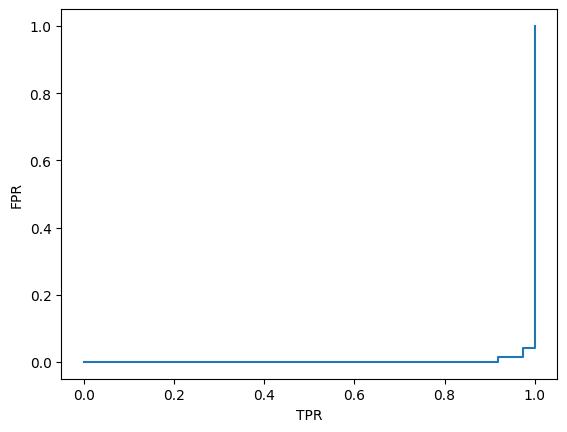

In [ ]:
plt.plot(tpr,fpr)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train_bool_label,logistic.predict_proba(X_train_scaled)[:,1].reshape(-1,1))

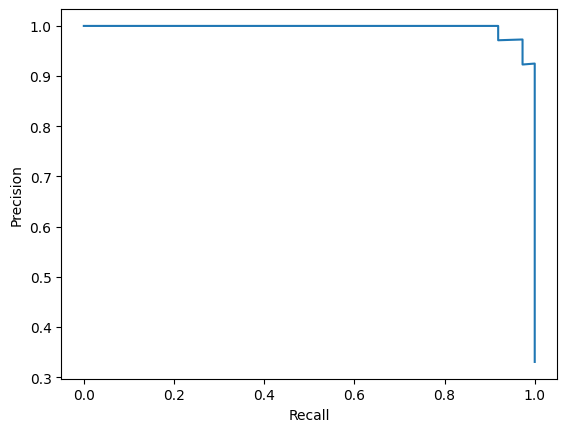

In [ ]:
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()